In [22]:
import pandas as pd

# Laden des Datensatzes
titanic_data_set = pd.read_csv("train.csv")

In [23]:
# Schritt 1: Überblick über den Datensatz verschaffen
# Diese Methode gibt uns Informationen über die Spalten, die Datentypen und die Anzahl der nicht-nullen Werte
titanic_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
titanic_data_set.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [25]:
# Schritt 2: Entfernen irrelevanter oder fehlerhafter Spalten
# Hier entfernen wir Spalten wie "Cabin", "Embarked", "Name", "Ticket", "PassengerId", da sie entweder viele fehlende Werte haben oder nicht direkt zur Modellierung beitragen
titanic_data_set = titanic_data_set.drop(columns=["Cabin", "Embarked", "Name", "Ticket", "PassengerId"])

# Schritt 3: Rundung der "Fare"-Spalte auf 2 Dezimalstellen
# Wir runden die "Fare"-Spalte auf 2 Dezimalstellen für eine bessere Lesbarkeit
titanic_data_set["Fare"] = titanic_data_set["Fare"].round(2)

# Schritt 4: Behandlung fehlender Werte (NaN)
# Zuerst analysieren wir, welche Spalten noch fehlende Werte enthalten
nan_summary = titanic_data_set.isnull().sum()
print("\nAnzahl der NaN-Werte pro Spalte:")
print(nan_summary[nan_summary > 0])  # Nur Spalten mit NaNs anzeigen

# Schritt 5: Fehlende Werte in der "Age"-Spalte auffüllen
# Hier füllen wir die fehlenden Werte in "Age" basierend auf dem Median des jeweiligen Geschlechts
titanic_data_set["Age"] = titanic_data_set.groupby("Sex")["Age"].transform(
    lambda x: x.fillna(x.median())
)

# Überprüfen, ob noch fehlende Werte in "Age" existieren
remaining_nans = titanic_data_set["Age"].isna().sum()
if remaining_nans == 0:
    print("\nAlle fehlenden Werte in 'Age' wurden behoben.")
else:
    print(f"\nNoch {remaining_nans} fehlende Werte in 'Age' vorhanden.")

# Schritt 6: Alterswerte als Ganzzahlen umwandeln
# Um die Berechnungen zu erleichtern, konvertieren wir das Alter in Ganzzahlen
titanic_data_set["Age"] = titanic_data_set["Age"].astype(int)


Anzahl der NaN-Werte pro Spalte:
Age    177
dtype: int64

Alle fehlenden Werte in 'Age' wurden behoben.


In [26]:
titanic_data_set.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [27]:
titanic_data_set.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22,1,0,7.25
1,1,1,female,38,1,0,71.28
2,1,3,female,26,0,0,7.92


---

Visualisierung

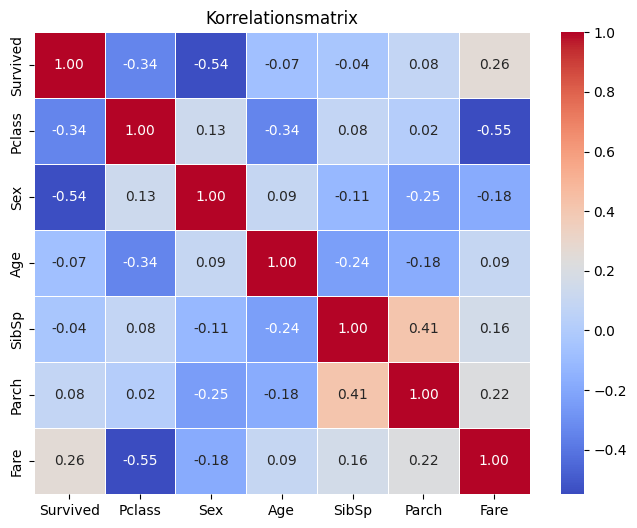

C:\Users\hamud\AppData\Local\Temp\ipykernel_15072\3691899203.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=titanic_data_set, palette="Blues")


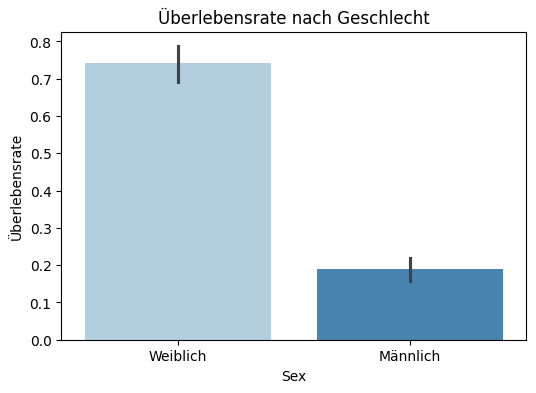

C:\Users\hamud\AppData\Local\Temp\ipykernel_15072\3691899203.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=titanic_data_set, palette="Set2")


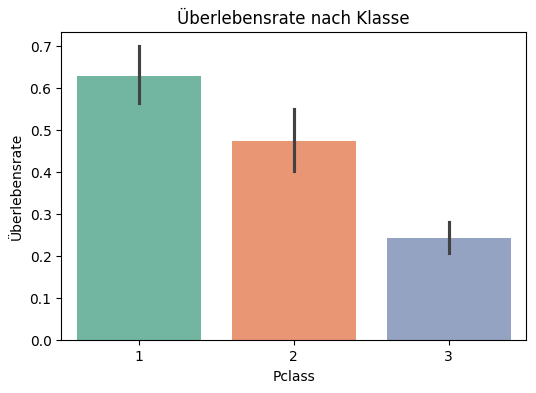

C:\Users\hamud\AppData\Local\Temp\ipykernel_15072\3691899203.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=titanic_data_set, palette="Set3")


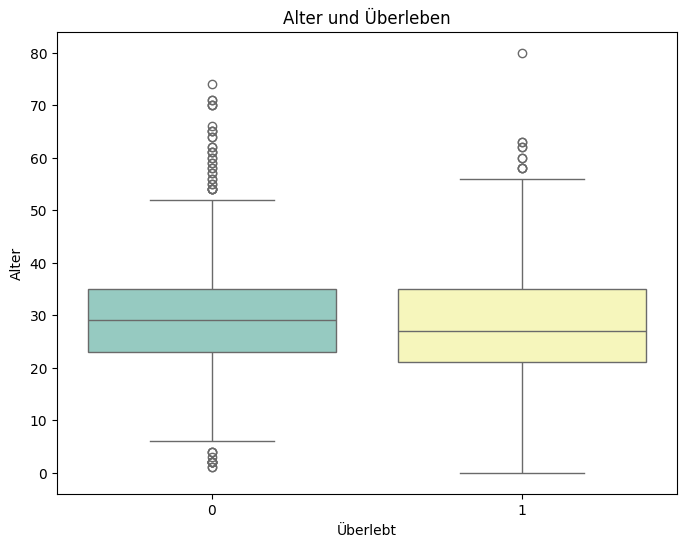

C:\Users\hamud\AppData\Local\Temp\ipykernel_15072\3691899203.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="SibSp", y="Survived", data=titanic_data_set, palette="pastel")


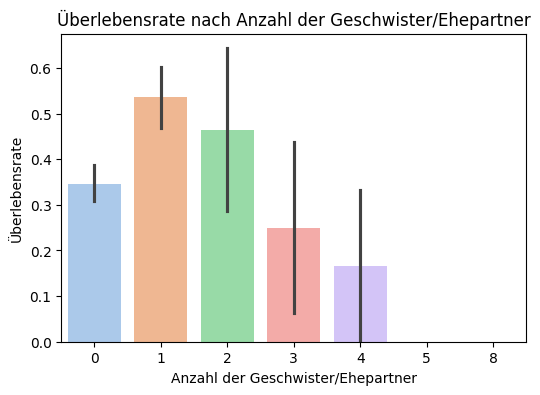

C:\Users\hamud\AppData\Local\Temp\ipykernel_15072\3691899203.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Parch", y="Survived", data=titanic_data_set, palette="pastel")


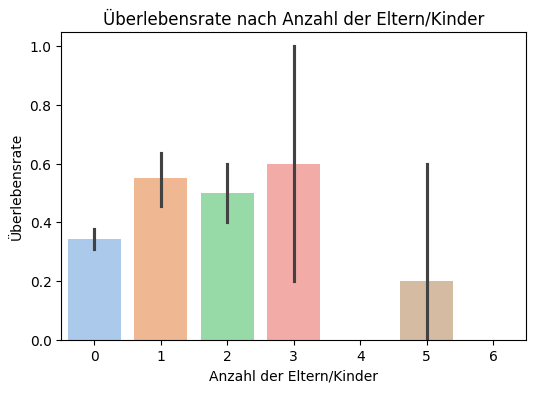

C:\Users\hamud\AppData\Local\Temp\ipykernel_15072\3691899203.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=titanic_data_set, palette="coolwarm")


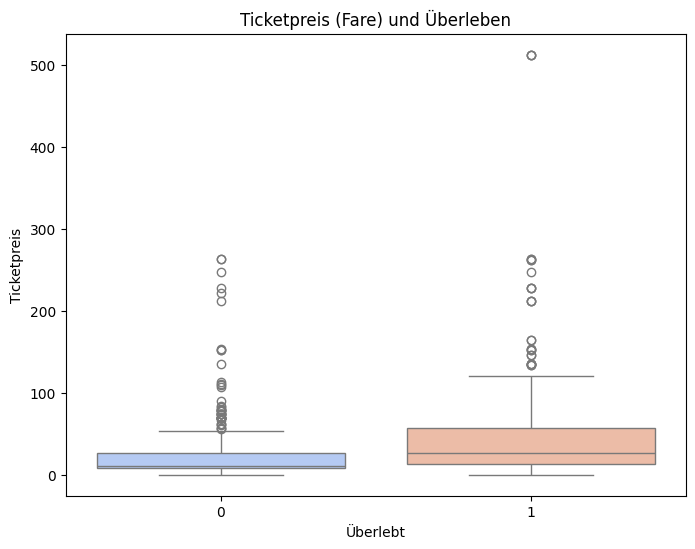

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Angenommen, der DataFrame heißt titanic_data_set und enthält bereits die notwendigen Daten.
# Schritt 1: Substituiere 'male' und 'female' in der 'Sex' Spalte
titanic_data_set['Sex'] = titanic_data_set['Sex'].map({'male': 1, 'female': 0})

# Schritt 2: Korrelationsmatrix
plt.figure(figsize=(8, 6))
correlation_matrix = titanic_data_set[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korrelationsmatrix")
plt.show()

# Schritt 3: Überlebensrate nach Geschlecht
plt.figure(figsize=(6, 4))
sns.barplot(x="Sex", y="Survived", data=titanic_data_set, palette="Blues")
plt.title("Überlebensrate nach Geschlecht")
plt.xticks([0, 1], ['Weiblich', 'Männlich'], rotation=0)
plt.ylabel("Überlebensrate")
plt.show()

# Schritt 4: Überlebensrate nach Pclass (Klasse)
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", data=titanic_data_set, palette="Set2")
plt.title("Überlebensrate nach Klasse")
plt.ylabel("Überlebensrate")
plt.show()

# Schritt 5: Boxplot für das Alter nach Überleben
plt.figure(figsize=(8, 6))
sns.boxplot(x="Survived", y="Age", data=titanic_data_set, palette="Set3")
plt.title("Alter und Überleben")
plt.xlabel("Überlebt")
plt.ylabel("Alter")
plt.show()

# Schritt 6: Überlebensrate basierend auf SibSp (Anzahl der Geschwister/Ehepartner)
plt.figure(figsize=(6, 4))
sns.barplot(x="SibSp", y="Survived", data=titanic_data_set, palette="pastel")
plt.title("Überlebensrate nach Anzahl der Geschwister/Ehepartner")
plt.xlabel("Anzahl der Geschwister/Ehepartner")
plt.ylabel("Überlebensrate")
plt.show()

# Schritt 7: Überlebensrate basierend auf Parch (Anzahl der Eltern/Kinder)
plt.figure(figsize=(6, 4))
sns.barplot(x="Parch", y="Survived", data=titanic_data_set, palette="pastel")
plt.title("Überlebensrate nach Anzahl der Eltern/Kinder")
plt.xlabel("Anzahl der Eltern/Kinder")
plt.ylabel("Überlebensrate")
plt.show()

# Schritt 8: Boxplot für den Ticketpreis (Fare) nach Überleben
plt.figure(figsize=(8, 6))
sns.boxplot(x="Survived", y="Fare", data=titanic_data_set, palette="coolwarm")
plt.title("Ticketpreis (Fare) und Überleben")
plt.xlabel("Überlebt")
plt.ylabel("Ticketpreis")
plt.show()


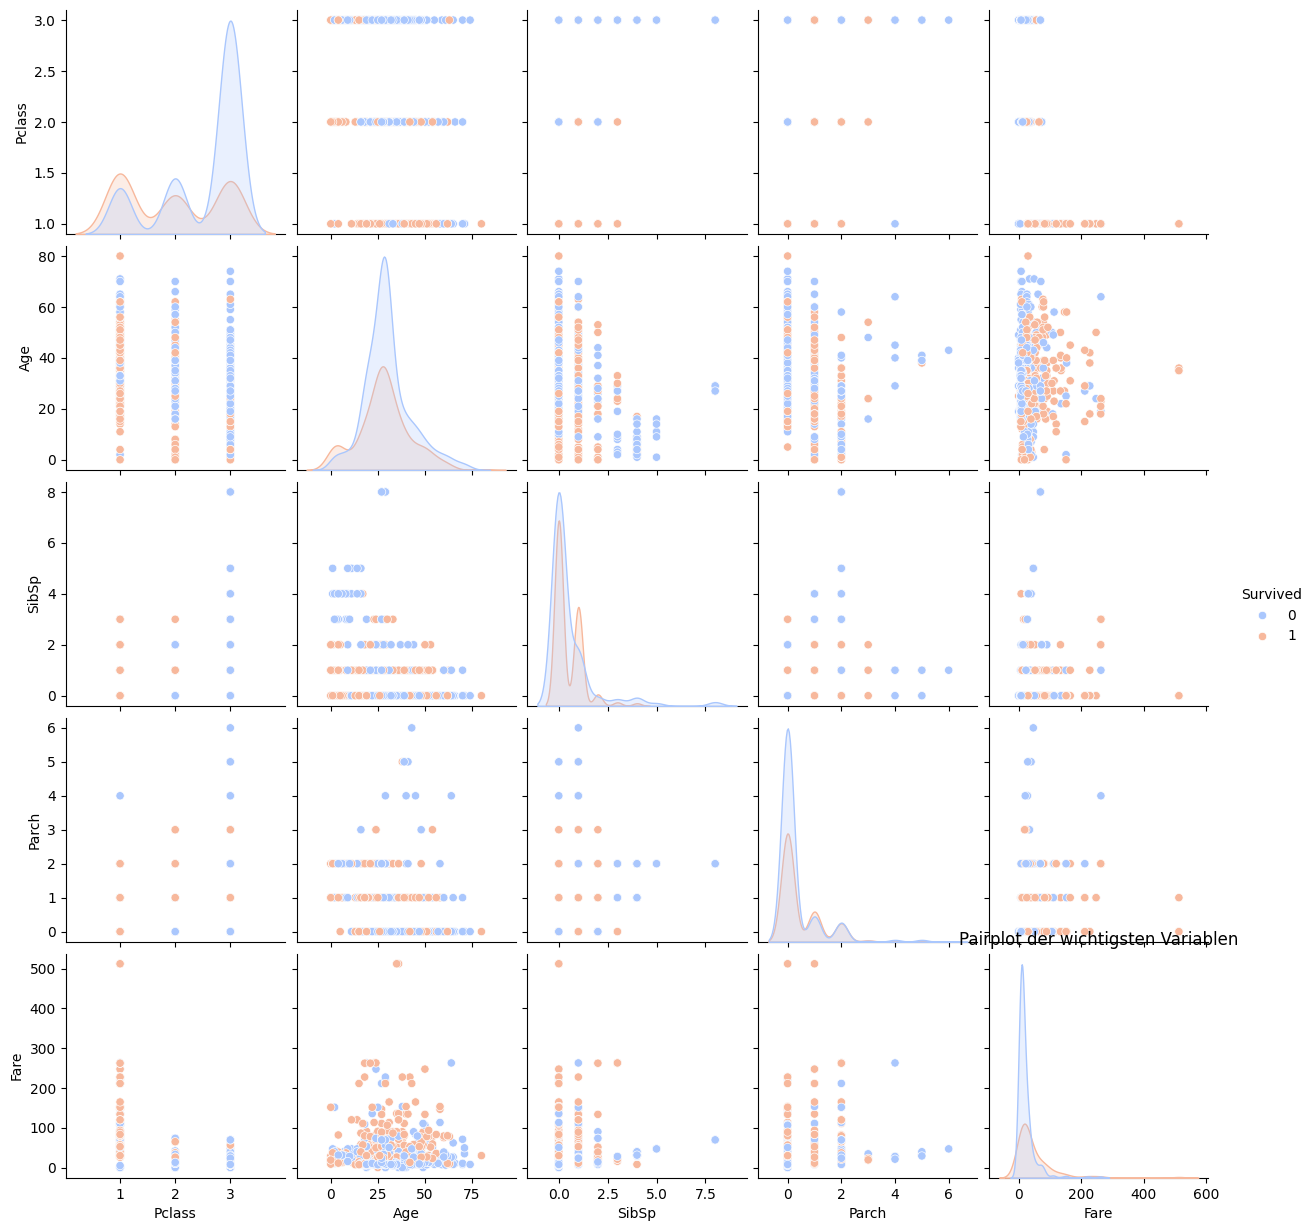

In [29]:
# Pairplot für die wichtigsten Variablen
sns.pairplot(titanic_data_set[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue="Survived", palette="coolwarm")
plt.title("Pairplot der wichtigsten Variablen")
plt.show()


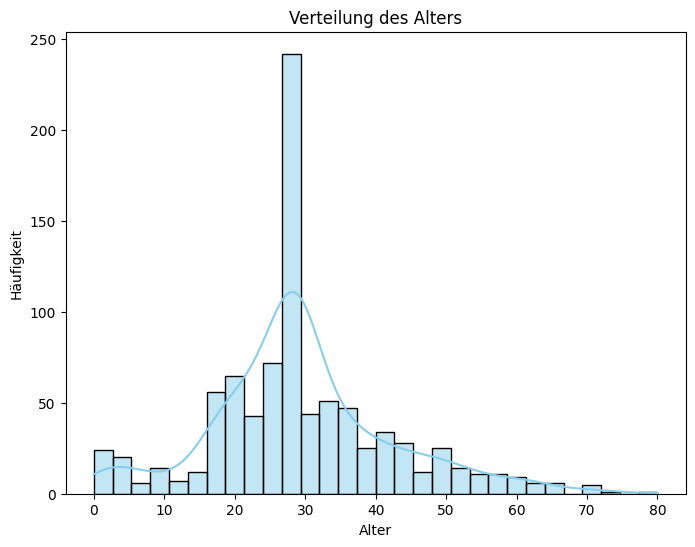

In [30]:
# Alterverteilung
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data_set['Age'].dropna(), kde=True, color='skyblue', bins=30)
plt.title("Verteilung des Alters")
plt.xlabel("Alter")
plt.ylabel("Häufigkeit")
plt.show()


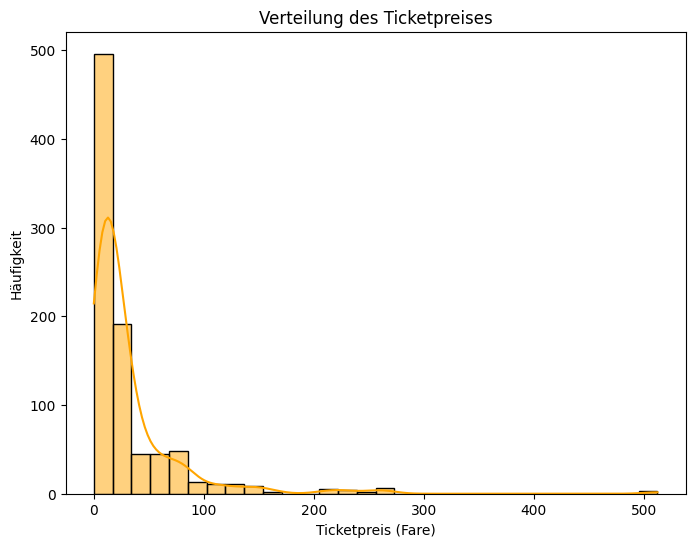

In [31]:
# Ticketpreisverteilung
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data_set['Fare'], kde=True, color='orange', bins=30)
plt.title("Verteilung des Ticketpreises")
plt.xlabel("Ticketpreis (Fare)")
plt.ylabel("Häufigkeit")
plt.show()


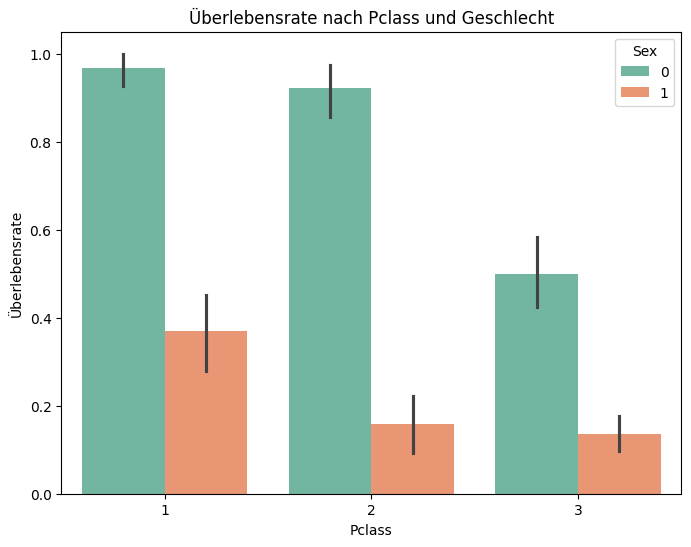

In [32]:
# Überlebensrate nach Pclass und Geschlecht
plt.figure(figsize=(8, 6))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_data_set, palette="Set2")
plt.title("Überlebensrate nach Pclass und Geschlecht")
plt.ylabel("Überlebensrate")
plt.show()


C:\Users\hamud\AppData\Local\Temp\ipykernel_15072\2837706914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=titanic_data_set, palette="Set3")


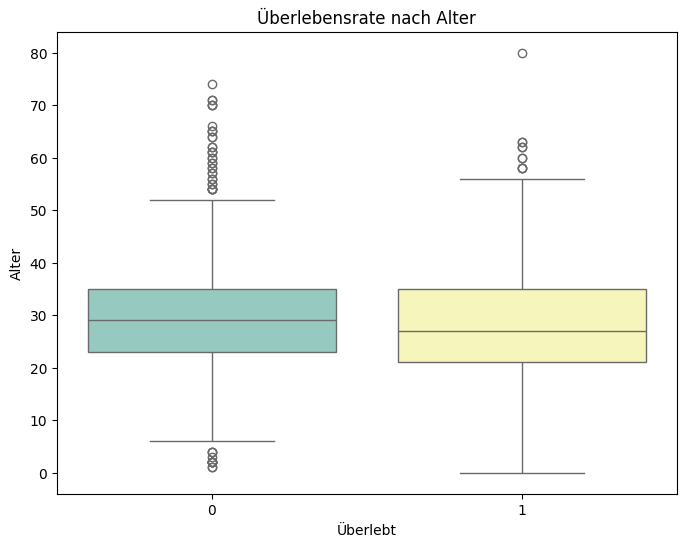

In [33]:
# Boxplot Alter vs. Überleben
plt.figure(figsize=(8, 6))
sns.boxplot(x="Survived", y="Age", data=titanic_data_set, palette="Set3")
plt.title("Überlebensrate nach Alter")
plt.xlabel("Überlebt")
plt.ylabel("Alter")
plt.show()


C:\Users\hamud\AppData\Local\Temp\ipykernel_15072\106720926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="FamilySize", y="Survived", data=titanic_data_set, palette="muted")


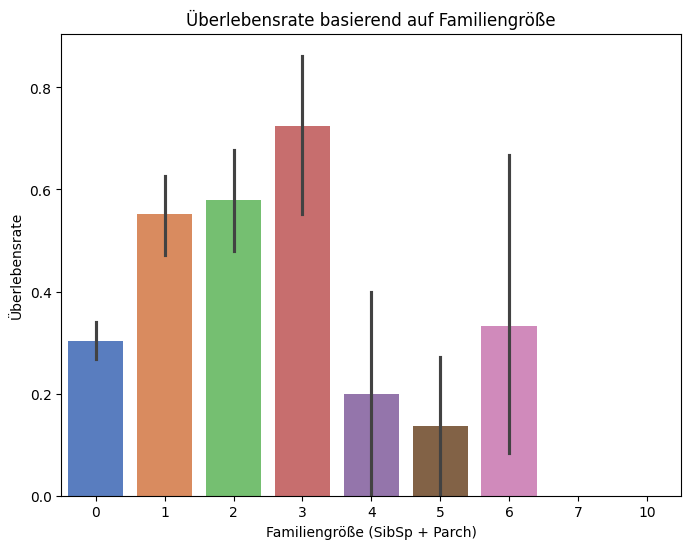

In [34]:
# Überlebensrate nach Familiengröße (SibSp + Parch)
titanic_data_set['FamilySize'] = titanic_data_set['SibSp'] + titanic_data_set['Parch']
plt.figure(figsize=(8, 6))
sns.barplot(x="FamilySize", y="Survived", data=titanic_data_set, palette="muted")
plt.title("Überlebensrate basierend auf Familiengröße")
plt.xlabel("Familiengröße (SibSp + Parch)")
plt.ylabel("Überlebensrate")
plt.show()


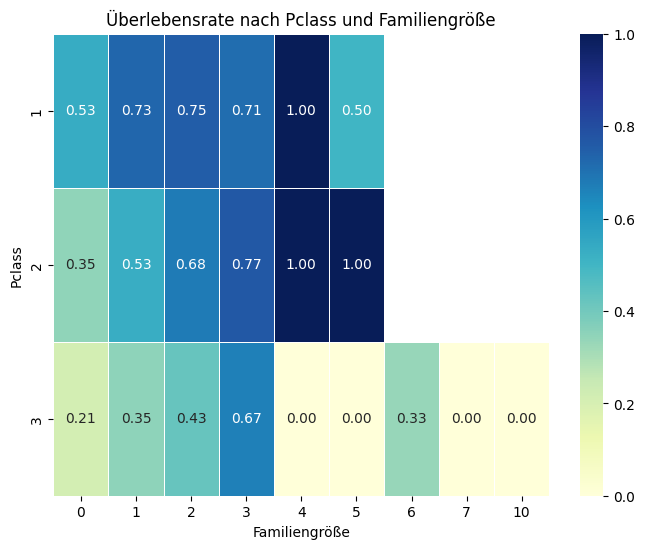

In [35]:
# Heatmap der Überlebensraten
pivot_data = titanic_data_set.pivot_table(values="Survived", index="Pclass", columns="FamilySize")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Überlebensrate nach Pclass und Familiengröße")
plt.ylabel("Pclass")
plt.xlabel("Familiengröße")
plt.show()


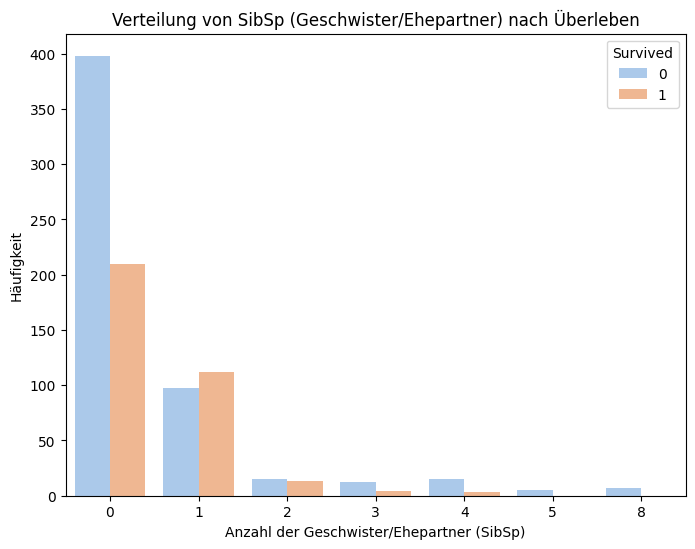

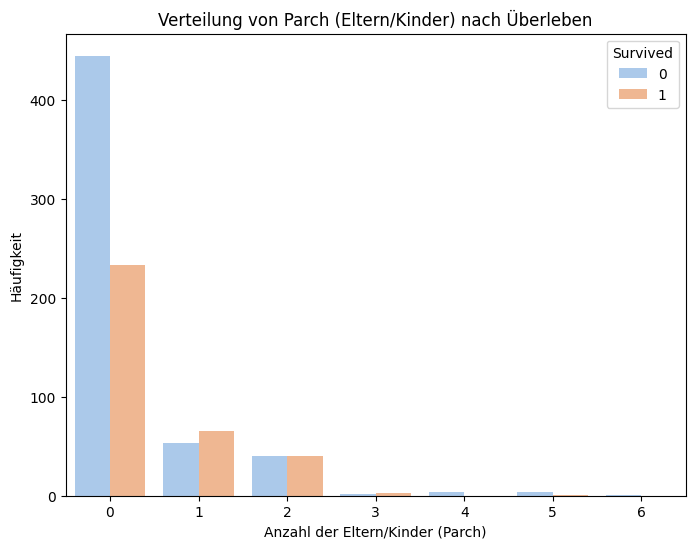

In [36]:

# Verteilung von SibSp und Parch
plt.figure(figsize=(8, 6))
sns.countplot(x="SibSp", hue="Survived", data=titanic_data_set, palette="pastel")
plt.title("Verteilung von SibSp (Geschwister/Ehepartner) nach Überleben")
plt.xlabel("Anzahl der Geschwister/Ehepartner (SibSp)")
plt.ylabel("Häufigkeit")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x="Parch", hue="Survived", data=titanic_data_set, palette="pastel")
plt.title("Verteilung von Parch (Eltern/Kinder) nach Überleben")
plt.xlabel("Anzahl der Eltern/Kinder (Parch)")
plt.ylabel("Häufigkeit")
plt.show()


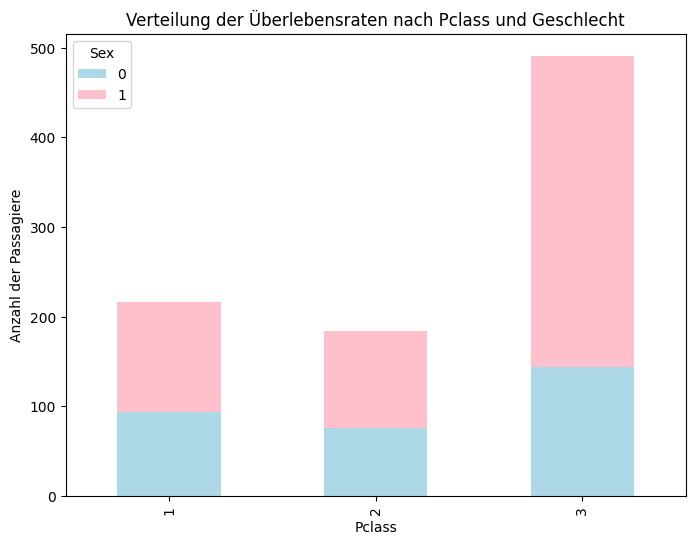

In [37]:
# Verteilung der Überlebensraten nach Pclass und Sex
pd.crosstab(titanic_data_set['Pclass'], titanic_data_set['Sex']).plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'pink'])
plt.title("Verteilung der Überlebensraten nach Pclass und Geschlecht")
plt.xlabel("Pclass")
plt.ylabel("Anzahl der Passagiere")
plt.show()


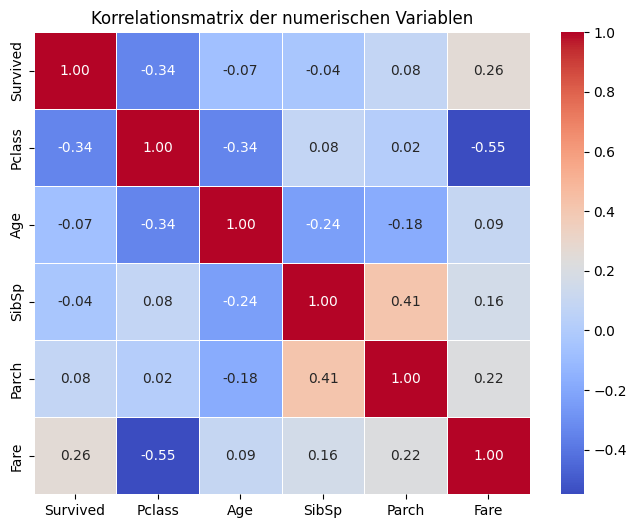

In [38]:
# Heatmap der Korrelation zwischen numerischen Variablen
correlation_matrix = titanic_data_set[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korrelationsmatrix der numerischen Variablen")
plt.show()
